<a href="https://colab.research.google.com/github/Angy-face/Esan-Coding-SS2/blob/main/Usecase_Uniclo_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv('/content/Uniqlo2012-2016Training.csv')
df_test = pd.read_csv('/content/Uniqlo2017Test.csv')

In [39]:
df_train

,Open,High,Low,Close,Volume,StockTrading
0,42120,42330,41700,41830,610000,2.562803e+10
1,43000,43220,42540,42660,448400,1.918823e+10
2,43940,43970,43270,43270,339900,1.478067e+10
3,43140,43700,43140,43620,400100,1.742799e+10
4,43310,43660,43090,43340,358200,1.554780e+10
...,...,...,...,...,...,...
1221,14360,14750,14280,14590,1043400,1.519199e+10
1222,13890,14390,13860,14390,952300,1.353341e+10
1223,13990,14030,13790,13850,765500,1.063561e+10
1224,13720,13840,13600,13800,511500,7.030811e+09


In [25]:
df_train.drop(['Date'],axis = 1,inplace = True)


In [38]:
df_test

,Open,High,Low,Close,Volume,StockTrading
0,38900,39380,38240,38430,1321200,51197289000
1,38300,38450,37930,38010,800900,30540359000
2,38710,38880,38480,38560,545900,21089798000
3,38620,38850,38150,38690,1196900,46107703000
4,40500,41030,39720,39720,1435500,57708934000
5,43250,43330,42470,42590,516800,22124250000
6,42480,43330,42450,43290,648100,27916728000


In [23]:
df_test.drop(['Date'],axis = 1,inplace = True)

In [26]:
df_train.isna().sum(),df_test.isna().sum()

(Open            0
 High            0
 Low             0
 Close           0
 Volume          0
 StockTrading    0
 dtype: int64,
 Open            0
 High            0
 Low             0
 Close           0
 Volume          0
 StockTrading    0
 dtype: int64)

In [27]:
 from sklearn.neural_network import MLPRegressor

In [29]:
train_data = df_train.drop(['StockTrading'],axis = 1)
train_y = df_train['StockTrading']

test_data = df_test.drop(['StockTrading'],axis = 1)
test_y = df_test['StockTrading']

In [113]:
ann_model = MLPRegressor(activation='relu',
                         alpha=0.1,
                         hidden_layer_sizes=(5,10,5),
                         random_state=42,
                         max_iter=1000,
                         learning_rate_init=0.05,
                         momentum=0.8,
                         solver = 'adam')
ann_model.fit(train_data,train_y)
accuracy = ann_model.score(test_data,test_y)
accuracy

0.8027124011849096

In [77]:
y_pred = ann_model.predict(test_data)
y_pred

array([4.08278416e+10, 2.81937585e+10, 2.21806801e+10, 3.78041325e+10,
       4.39267263e+10, 2.24790844e+10, 2.56298370e+10])

In [78]:
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,4.082784e+10
1,2.819376e+10
2,2.218068e+10
3,3.780413e+10
4,4.392673e+10
5,2.247908e+10
6,2.562984e+10


In [79]:
df_final  = pd.concat([test_data,y_pred],axis = 1)
df_final

,Open,High,Low,Close,Volume,Predicted
0,38900,39380,38240,38430,1321200,4.082784e+10
1,38300,38450,37930,38010,800900,2.819376e+10
2,38710,38880,38480,38560,545900,2.218068e+10
3,38620,38850,38150,38690,1196900,3.780413e+10
4,40500,41030,39720,39720,1435500,4.392673e+10
5,43250,43330,42470,42590,516800,2.247908e+10
6,42480,43330,42450,43290,648100,2.562984e+10


In [73]:
from sklearn.metrics import mean_squared_error

In [80]:
accuracy = ann_model.score(test_data,test_y)
mse = mean_squared_error(test_y,y_pred)
accuracy,mse

(0.7113650489080661, 5.4068043736424505e+19)

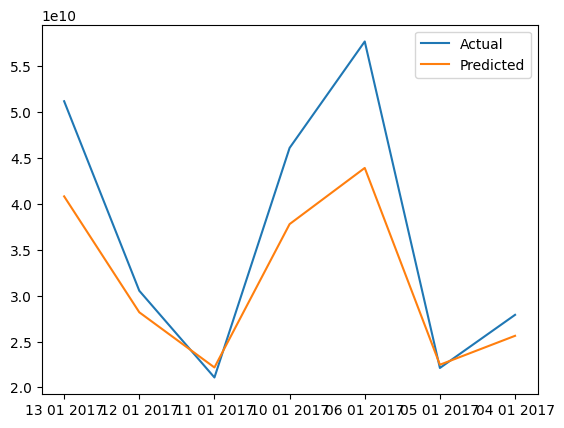

In [81]:
x = pd.read_csv('/content/Uniqlo2017Test.csv').Date
y = df_test['StockTrading']
plt.plot(x,y,label = 'Actual')
plt.plot(x,y_pred,label = 'Predicted')
plt.legend()
plt.show()


In [82]:
import numpy as np